<a href="https://colab.research.google.com/github/Arijitde24/Machine-learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
skin_disease = pd.read_csv("/content/drive/MyDrive/DATASETS/dataset.csv")

In [ ]:
skin_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
skin_disease.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [ ]:
skin_disease.isnull().mean()*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [ ]:
# BENCHMARK  --> columns with null values less than 50%
disease = skin_disease[['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']]

In [ ]:
disease

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
for col in disease.columns:
    if disease[col].dtype == object:
        disease[col] = disease[col].fillna(disease[col].mode()[0])
    else:
        disease[col] = disease[col].fillna(disease[col].mean())

/tmp/ipython-input-726087666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease[col] = disease[col].fillna(disease[col].mode()[0])


In [ ]:
disease

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,headache,nausea
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea
3,Fungal infection,itching,skin_rash,dischromic _patches,high_fever,headache,nausea
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,high_fever,headache,nausea
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,headache,nausea
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,headache,nausea
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
disease.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0
Symptom_6,0


In [ ]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4920 non-null   object
 5   Symptom_5  4920 non-null   object
 6   Symptom_6  4920 non-null   object
dtypes: object(7)
memory usage: 269.2+ KB


In [ ]:

le = LabelEncoder()

In [ ]:
mappings = {}


disease['Disease'] = le.fit_transform(disease['Disease'])
mappings['Disease'] = dict(zip(le.classes_, le.transform(le.classes_)))
Disease_label = pd.DataFrame(list(mappings['Disease'].items()), columns=['Disease', 'Label'])

for col in ["Symptom_1","Symptom_2","Symptom_3","Symptom_4","Symptom_5","Symptom_6"]:

    disease[col] = le.fit_transform(disease[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print mappings neatly
for col, mapping in mappings.items():
    print(f"\nColumn: {col}")
    for cls, idx in mapping.items():
        print(f"{cls} -> {idx}")



Column: Disease
(vertigo) Paroymsal  Positional Vertigo -> 0
AIDS -> 1
Acne -> 2
Alcoholic hepatitis -> 3
Allergy -> 4
Arthritis -> 5
Bronchial Asthma -> 6
Cervical spondylosis -> 7
Chicken pox -> 8
Chronic cholestasis -> 9
Common Cold -> 10
Dengue -> 11
Diabetes  -> 12
Dimorphic hemmorhoids(piles) -> 13
Drug Reaction -> 14
Fungal infection -> 15
GERD -> 16
Gastroenteritis -> 17
Heart attack -> 18
Hepatitis B -> 19
Hepatitis C -> 20
Hepatitis D -> 21
Hepatitis E -> 22
Hypertension  -> 23
Hyperthyroidism -> 24
Hypoglycemia -> 25
Hypothyroidism -> 26
Impetigo -> 27
Jaundice -> 28
Malaria -> 29
Migraine -> 30
Osteoarthristis -> 31
Paralysis (brain hemorrhage) -> 32
Peptic ulcer diseae -> 33
Pneumonia -> 34
Psoriasis -> 35
Tuberculosis -> 36
Typhoid -> 37
Urinary tract infection -> 38
Varicose veins -> 39
hepatitis A -> 40

Column: Symptom_1
 acidity -> 0
 back_pain -> 1
 bladder_discomfort -> 2
 breathlessness -> 3
 burning_micturition -> 4
 chest_pain -> 5
 chills -> 6
 constipation -> 

/tmp/ipython-input-3950550449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease['Disease'] = le.fit_transform(disease['Disease'])
/tmp/ipython-input-3950550449.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease[col] = le.fit_transform(disease[col])
/tmp/ipython-input-3950550449.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,15,33,35,35,11,12,20
1,15,24,27,18,19,12,20
2,15,33,27,18,19,12,20
3,15,33,35,18,19,12,20
4,15,33,35,35,19,12,20


In [ ]:
x = disease.drop('Disease',axis=1)
y = disease['Disease']

In [ ]:
y.unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
mod = KNeighborsClassifier()
mod.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = mod.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9847560975609756

In [ ]:
#TRAINING ACCURACY
acc_train=mod.score(x_train,y_train)
acc_train

0.9961890243902439

In [ ]:
new_rec=pd.DataFrame(columns=x.columns)
new_rec

new_rec.loc[0]=[33,35,15,22,14,13]
new_rec

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,33,35,15,22,14,13


In [ ]:
mod.predict(new_rec)

array([8])

In [ ]:
Disease_label

,Disease,Label
0,(vertigo) Paroymsal Positional Vertigo,0
1,AIDS,1
2,Acne,2
3,Alcoholic hepatitis,3
4,Allergy,4
5,Arthritis,5
6,Bronchial Asthma,6
7,Cervical spondylosis,7
8,Chicken pox,8
9,Chronic cholestasis,9


In [ ]:
Disease_label[Disease_label['Label']==8]

,Disease,Label
8,Chicken pox,8


In [ ]:
disease[disease['Disease']==8]

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
160,8,33,35,21,24,13,12
161,8,24,15,28,19,12,17
162,8,33,15,28,19,12,17
163,8,33,35,28,19,12,17
164,8,33,35,21,19,12,17
...,...,...,...,...,...,...,...
4731,8,33,35,21,24,13,12
4772,8,33,35,21,24,13,12
4813,8,33,35,21,24,13,12
4854,8,33,35,21,24,13,12


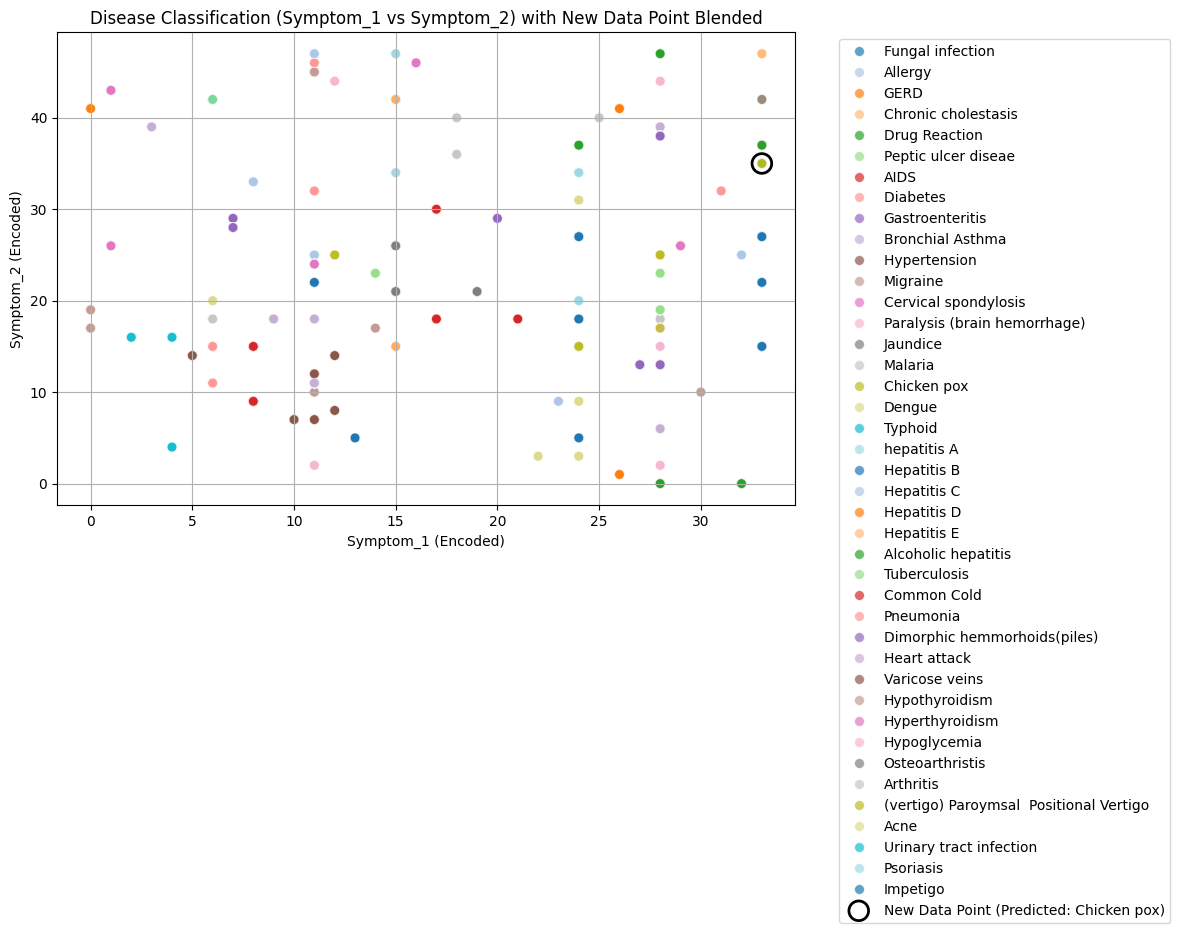

In [ ]:
predicted_label = mod.predict(new_rec)[0]
x_combined = pd.concat([x, new_rec], ignore_index=True)
y_combined = pd.concat([y, pd.Series([predicted_label])], ignore_index=True)

# Create a mapping from label to disease name
label_to_disease_name = dict(zip(Disease_label['Label'], Disease_label['Disease']))

# Map the numerical labels in y_combined to their corresponding disease names
y_combined_names = y_combined.map(label_to_disease_name)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_combined['Symptom_1'], y=x_combined['Symptom_2'], hue=y_combined_names, palette='tab20', legend='full', s=50, alpha=0.7)

# Highlight the new data point with a distinct border or marker for emphasis
plt.scatter(new_rec['Symptom_1'], new_rec['Symptom_2'], color='none', edgecolor='black', marker='o', s=200, linewidth=2, label=f'New Data Point (Predicted: {label_to_disease_name[predicted_label]})')

plt.title('Disease Classification (Symptom_1 vs Symptom_2) with New Data Point Blended')
plt.xlabel('Symptom_1 (Encoded)')
plt.ylabel('Symptom_2 (Encoded)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()